# 유성구 관련 데이터 전처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,306 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and dire

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

## 데이터 불러오기 및 전처리
* 법정동별 숙박 및 음식점업 소비금액_데이터.csv
* 법정동별-일평균-유동인구-데이터_2022.csv
* 유성구 법정동별 상권 전처리.csv
* 유성구 법정동별 인구수 및 일별예상쓰레기발생량.csv
* 대전광역시 유성구_생활쓰레기 배출장소_20221212.csv

In [ ]:
# 데이터 불러오기

df1 = pd.read_csv('/content/drive/MyDrive/유성구 데이터/법정동별 숙박 및 음식점업 소비금액_데이터.csv')
df2 = pd.read_csv('/content/drive/MyDrive/유성구 데이터/법정동별-일평균-유동인구-데이터_2022.csv')
df3 = pd.read_csv('/content/drive/MyDrive/유성구 데이터/유성구 법정동별 상권 전처리.csv')
df4 = pd.read_csv('/content/drive/MyDrive/유성구 데이터/유성구 법정동별 인구수 및 일별예상쓰레기발생량.csv')
df5 = pd.read_csv('/content/drive/MyDrive/유성구 데이터/유성구 지도/대전광역시 유성구_생활쓰레기 배출장소_20221212.csv', encoding='cp949')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = df2.drop(columns=['법정동코드', '시간대','기준월','기준년도'])
df2

,법정동명,일평균유동인구
0,대정동,3884.82
1,세동,18.96
2,구암동,5032.10
3,장대동,47364.26
4,갑동,144.36
...,...,...
3168,구룡동,1547.40
3169,구룡동,1170.50
3170,구룡동,4325.33
3171,구룡동,767.57


In [ ]:
df2 = df2.groupby('법정동명')['일평균유동인구'].mean().reset_index()
df2

,법정동명,일평균유동인구
0,가정동,6998.618667
1,갑동,1053.025333
2,계산동,6587.045500
3,관평동,29143.159500
4,교촌동,1685.848833
5,구룡동,531.006167
6,구성동,8572.642500
7,구암동,16227.192833
8,궁동,33113.545333
9,금고동,187.418000


In [ ]:
df3 = df3.drop(columns=['Unnamed: 0', '시군구명','행정동명'])
df3

,상권명,법정동명,경도,위도
0,소매,노은동,127.321501,36.367960
1,음식,지족동,127.319681,36.373474
2,소매,관평동,127.389132,36.423616
3,음식,봉산동,127.387330,36.435801
4,음식,봉명동,127.342177,36.354287
...,...,...,...,...
9958,소매,원내동,127.317598,36.303174
9959,소매,죽동,127.322442,36.382890
9960,음식,궁동,127.350799,36.363896
9961,음식,관평동,127.387717,36.430567


In [ ]:
len(df3['법정동명'].unique())

53

In [ ]:
df4 = df4.drop(columns=['Unnamed: 0','시군구명','행정동명','geometry'])
df4

,법정동명,인구수,예상쓰레기발생량
0,원내동,11534.0,6920.4
1,교촌동,4532.0,2719.2
2,대정동,4570.0,2742.0
3,용계동,3427.0,2056.2
4,성북동,381.0,228.6
5,세동,334.0,200.4
6,송정동,327.0,196.2
7,방동,340.0,204.0
8,학하동,2821.0,1692.6
9,계산동,8205.0,4923.0


In [ ]:
df4 = df4.rename(columns={'예상쓰레기발생량':'일별예상쓰레기발생량'})
df4

,법정동명,인구수,일별예상쓰레기발생량
0,원내동,11534.0,6920.4
1,교촌동,4532.0,2719.2
2,대정동,4570.0,2742.0
3,용계동,3427.0,2056.2
4,성북동,381.0,228.6
5,세동,334.0,200.4
6,송정동,327.0,196.2
7,방동,340.0,204.0
8,학하동,2821.0,1692.6
9,계산동,8205.0,4923.0


In [ ]:
df3 = df3.rename(columns={'위도':'상권위도','경도':'상권경도'})
df3

,상권명,법정동명,상권경도,상권위도
0,소매,노은동,127.321501,36.367960
1,음식,지족동,127.319681,36.373474
2,소매,관평동,127.389132,36.423616
3,음식,봉산동,127.387330,36.435801
4,음식,봉명동,127.342177,36.354287
...,...,...,...,...
9958,소매,원내동,127.317598,36.303174
9959,소매,죽동,127.322442,36.382890
9960,음식,궁동,127.350799,36.363896
9961,음식,관평동,127.387717,36.430567


In [ ]:
df5['유형'].unique()

array(['일반쓰레기', '생활폐기물', '재활용품', '음식물쓰레기'], dtype=object)

In [ ]:
df5 = df5.drop(columns=['연번', '고유번호', '위치번호', '시도', '시군','도로명주소', '지번주소', '상세주소','사용자고유번호', '등록일', '사용유무', '카메라유무', '공공쓰레기통유무', '헌옷수거함유무',
       '일반쓰레기배출요일', '일반쓰레기배출시간', '음식물쓰레기배출요일', '음식물쓰레기배출시간', '재활용품배출요일',
       '재활용품배출시간', '미수거일', '이미지고유번호'])
df5 = df5.rename(columns={'동':'법정동명'})

In [ ]:
df5 = df5[df5['유형'].isin(['일반쓰레기','재활용품'])]
df5 = df5.reset_index(drop=True)
df5

,유형,법정동명,위도,경도
0,일반쓰레기,장대동,36.357235,127.333444
1,일반쓰레기,장대동,36.357027,127.334261
2,일반쓰레기,장대동,36.357331,127.333233
3,일반쓰레기,장대동,36.357131,127.333653
4,재활용품,장대동,36.357132,127.333654
...,...,...,...,...
8035,일반쓰레기,용산동,36.416210,127.396224
8036,재활용품,용산동,36.416212,127.396226
8037,재활용품,용산동,36.419628,127.399375
8038,일반쓰레기,용산동,36.417631,127.397213


In [ ]:
df5 = df5.rename(columns={'위도':'쓰레기통위도','경도':'쓰레기통경도'})
df5

,유형,법정동명,쓰레기통위도,쓰레기통경도
0,일반쓰레기,장대동,36.357235,127.333444
1,일반쓰레기,장대동,36.357027,127.334261
2,일반쓰레기,장대동,36.357331,127.333233
3,일반쓰레기,장대동,36.357131,127.333653
4,재활용품,장대동,36.357132,127.333654
...,...,...,...,...
8035,일반쓰레기,용산동,36.416210,127.396224
8036,재활용품,용산동,36.416212,127.396226
8037,재활용품,용산동,36.419628,127.399375
8038,일반쓰레기,용산동,36.417631,127.397213


In [ ]:
df5 = df5.rename(columns={'위도':'쓰레기통위도','경도':'쓰레기통경도'})
df5

,유형,법정동명,쓰레기통위도,쓰레기통경도
0,일반쓰레기,장대동,36.357235,127.333444
1,일반쓰레기,장대동,36.357027,127.334261
2,일반쓰레기,장대동,36.357331,127.333233
3,일반쓰레기,장대동,36.357131,127.333653
4,재활용품,장대동,36.357132,127.333654
...,...,...,...,...
8035,일반쓰레기,용산동,36.416210,127.396224
8036,재활용품,용산동,36.416212,127.396226
8037,재활용품,용산동,36.419628,127.399375
8038,일반쓰레기,용산동,36.417631,127.397213


In [ ]:
df1 = df1.drop(columns=['법정동코드'])

In [ ]:
df2

,법정동명,일평균유동인구
0,가정동,6998.618667
1,갑동,1053.025333
2,계산동,6587.045500
3,관평동,29143.159500
4,교촌동,1685.848833
5,구룡동,531.006167
6,구성동,8572.642500
7,구암동,16227.192833
8,궁동,33113.545333
9,금고동,187.418000


In [ ]:
s_count_df = df3.groupby('법정동명').size().reset_index(name='상권수')
s_count_df

,법정동명,상권수
0,가정동,17
1,갑동,36
2,계산동,100
3,관평동,674
4,교촌동,52
5,구룡동,14
6,구성동,35
7,구암동,331
8,궁동,478
9,금고동,3


In [ ]:
df4

,법정동명,인구수,일별예상쓰레기발생량
0,원내동,11534.0,6920.4
1,교촌동,4532.0,2719.2
2,대정동,4570.0,2742.0
3,용계동,3427.0,2056.2
4,성북동,381.0,228.6
5,세동,334.0,200.4
6,송정동,327.0,196.2
7,방동,340.0,204.0
8,학하동,2821.0,1692.6
9,계산동,8205.0,4923.0


In [ ]:
df5

,유형,법정동명,쓰레기통위도,쓰레기통경도
0,일반쓰레기,장대동,36.357235,127.333444
1,일반쓰레기,장대동,36.357027,127.334261
2,일반쓰레기,장대동,36.357331,127.333233
3,일반쓰레기,장대동,36.357131,127.333653
4,재활용품,장대동,36.357132,127.333654
...,...,...,...,...
8035,일반쓰레기,용산동,36.416210,127.396224
8036,재활용품,용산동,36.416212,127.396226
8037,재활용품,용산동,36.419628,127.399375
8038,일반쓰레기,용산동,36.417631,127.397213


In [ ]:
trash_df = df5.groupby('법정동명').size().reset_index(name='쓰레기통수')
trash_df

,법정동명,쓰레기통수
0,가정동,3
1,계산동,141
2,관평동,535
3,교촌동,104
4,구암동,818
5,궁동,792
6,노은동,397
7,덕명동,434
8,도룡동,101
9,문지동,121


In [ ]:
from functools import reduce

# 데이터프레임 리스트 생성
dfs = [df1, df2, s_count_df, df4, trash_df]

# reduce를 사용하여 병합
merged_df = reduce(lambda left, right: pd.merge(left, right, on='법정동명', how='outer'), dfs)

# 결과 확인
merged_df

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수
0,원내동,1.170997e+10,30367.871167,360,11534.0,6920.4,370.0
1,교촌동,8.769596e+08,1685.848833,52,4532.0,2719.2,104.0
2,대정동,5.648182e+09,7201.983833,184,4570.0,2742.0,NaN
3,용계동,1.321766e+09,4500.447000,54,3427.0,2056.2,NaN
4,학하동,1.632032e+09,6537.906667,68,2821.0,1692.6,170.0
5,계산동,1.615557e+10,6587.045500,100,8205.0,4923.0,141.0
6,성북동,1.719082e+09,757.364667,4,381.0,228.6,NaN
7,세동,1.337680e+07,62.184237,3,334.0,200.4,NaN
8,송정동,2.579143e+08,683.384833,8,327.0,196.2,NaN
9,방동,2.966344e+09,1031.587833,35,340.0,204.0,NaN


## 상관계수 계산 및 히트맵 시각화

In [ ]:
m_list = ['이용금액','상권수', '일평균유동인구', '인구수 ', '일별예상쓰레기발생량','쓰레기통수']
df = merged_df[m_list]

corr = df.corr(method='pearson')
print(corr)

                이용금액       상권수   일평균유동인구      인구수   일별예상쓰레기발생량     쓰레기통수
이용금액        1.000000  0.912890  0.662504  0.405854    0.405854  0.533453
상권수         0.912890  1.000000  0.830041  0.578257    0.578257  0.647042
일평균유동인구     0.662504  0.830041  1.000000  0.598208    0.598208  0.598610
인구수         0.405854  0.578257  0.598208  1.000000    1.000000  0.249011
일별예상쓰레기발생량  0.405854  0.578257  0.598208  1.000000    1.000000  0.249011
쓰레기통수       0.533453  0.647042  0.598610  0.249011    0.249011  1.000000


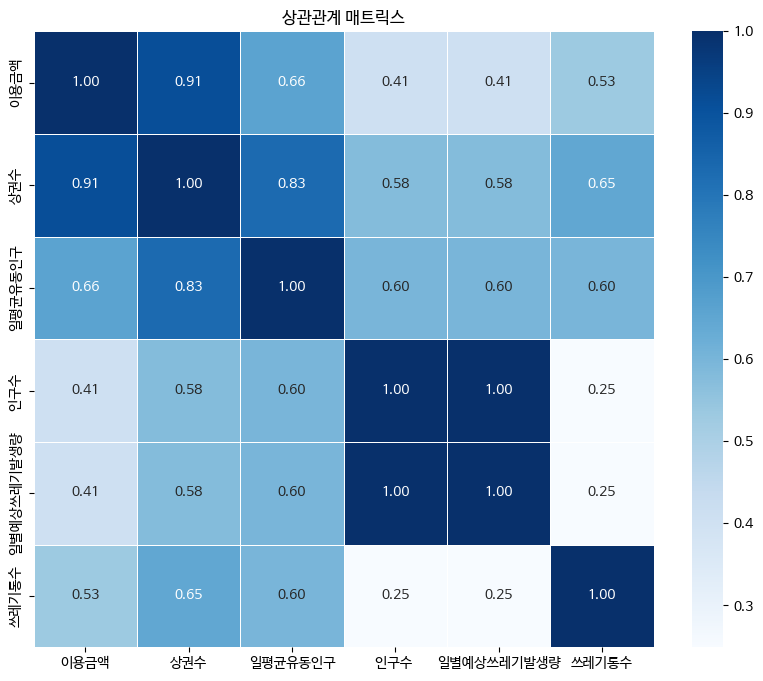

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 상관관계 매트릭스 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('상관관계 매트릭스')
plt.rc('font', family='NanumBarunGothic')
plt.show()

In [ ]:
merged_df2 = merged_df
merged_df2['쓰레기통수'] = merged_df2['쓰레기통수'].interpolate(method='linear')
merged_df2['이용금액'] = merged_df2['이용금액'].fillna(0)
merged_df2

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수
0,원내동,1.170997e+10,30367.871167,360,11534.0,6920.4,370.000000
1,교촌동,8.769596e+08,1685.848833,52,4532.0,2719.2,104.000000
2,대정동,5.648182e+09,7201.983833,184,4570.0,2742.0,126.000000
3,용계동,1.321766e+09,4500.447000,54,3427.0,2056.2,148.000000
4,학하동,1.632032e+09,6537.906667,68,2821.0,1692.6,170.000000
5,계산동,1.615557e+10,6587.045500,100,8205.0,4923.0,141.000000
6,성북동,1.719082e+09,757.364667,4,381.0,228.6,251.800000
7,세동,1.337680e+07,62.184237,3,334.0,200.4,362.600000
8,송정동,2.579143e+08,683.384833,8,327.0,196.2,473.400000
9,방동,2.966344e+09,1031.587833,35,340.0,204.0,584.200000


In [ ]:
merged_df2['일별예상쓰레기발생량'] = merged_df2['인구수 '] * 0.93
merged_df2

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수
0,원내동,1.170997e+10,30367.871167,360,11534.0,10726.62,370.000000
1,교촌동,8.769596e+08,1685.848833,52,4532.0,4214.76,104.000000
2,대정동,5.648182e+09,7201.983833,184,4570.0,4250.10,126.000000
3,용계동,1.321766e+09,4500.447000,54,3427.0,3187.11,148.000000
4,학하동,1.632032e+09,6537.906667,68,2821.0,2623.53,170.000000
5,계산동,1.615557e+10,6587.045500,100,8205.0,7630.65,141.000000
6,성북동,1.719082e+09,757.364667,4,381.0,354.33,251.800000
7,세동,1.337680e+07,62.184237,3,334.0,310.62,362.600000
8,송정동,2.579143e+08,683.384833,8,327.0,304.11,473.400000
9,방동,2.966344e+09,1031.587833,35,340.0,316.20,584.200000


In [ ]:
df = merged_df2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   법정동명        53 non-null     object 
 1   이용금액        53 non-null     float64
 2   일평균유동인구     53 non-null     float64
 3   상권수         53 non-null     int64  
 4   인구수         53 non-null     float64
 5   일별예상쓰레기발생량  53 non-null     float64
 6   쓰레기통수       53 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
df.to_csv('/content/drive/MyDrive/유성구 데이터/완최종_유성구_데이터.csv', index=False)

NameError: name 'df' is not defined

# 전처리 마친 최종 데이터 불러오기

In [39]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/유성구 데이터/완최종_유성구_데이터.csv')
df

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수
0,원내동,1.170997e+10,30367.871167,360,11534.0,10726.62,370.000000
1,교촌동,8.769596e+08,1685.848833,52,4532.0,4214.76,104.000000
2,대정동,5.648182e+09,7201.983833,184,4570.0,4250.10,126.000000
3,용계동,1.321766e+09,4500.447000,54,3427.0,3187.11,148.000000
4,학하동,1.632032e+09,6537.906667,68,2821.0,2623.53,170.000000
5,계산동,1.615557e+10,6587.045500,100,8205.0,7630.65,141.000000
6,성북동,1.719082e+09,757.364667,4,381.0,354.33,251.800000
7,세동,1.337680e+07,62.184237,3,334.0,310.62,362.600000
8,송정동,2.579143e+08,683.384833,8,327.0,304.11,473.400000
9,방동,2.966344e+09,1031.587833,35,340.0,316.20,584.200000


In [46]:
# prompt: 봉명동, 상대동, 장대동, 지족동, 전민동, 관평동의 일평균유동인구의 평균 계산과 나머지 법정동의 일평균유동인구의 평균 계산

# 봉명동, 상대동, 장대동, 지족동, 전민동, 관평동의 일평균유동인구의 평균 계산
target_dong = ['봉명동', '상대동', '장대동', '지족동', '전민동', '관평동']
target_df = df[df['법정동명'].isin(target_dong)]
target_avg = target_df['상권수'].mean()

# 나머지 법정동의 일평균유동인구의 평균 계산
other_df = df[~df['법정동명'].isin(target_dong)]
other_avg = other_df['상권수'].mean()

print(f"봉명동, 상대동, 장대동, 지족동, 전민동, 관평동의 일평균유동인구 평균: {target_avg}")
print(f"나머지 법정동의 일평균유동인구 평균: {other_avg}")


봉명동, 상대동, 장대동, 지족동, 전민동, 관평동의 일평균유동인구 평균: 749.8333333333334
나머지 법정동의 일평균유동인구 평균: 116.25531914893617


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 정규화할 컬럼 선택
cols_to_normalize = ['이용금액', '일평균유동인구', '상권수', '인구수 ', '일별예상쓰레기발생량', '쓰레기통수']

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택한 컬럼을 정규화
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 정규화된 데이터프레임을 new_df에 저장
new_df = df.copy()
new_df

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수
0,원내동,0.065071,0.391480,0.232513,0.464622,0.464622,0.450307
1,교촌동,0.004873,0.021444,0.033031,0.182489,0.182489,0.123926
2,대정동,0.031387,0.092609,0.118523,0.184020,0.184020,0.150920
3,용계동,0.007345,0.057756,0.034326,0.137964,0.137964,0.177914
4,학하동,0.009069,0.084042,0.043394,0.113547,0.113547,0.204908
5,계산동,0.089775,0.084675,0.064119,0.330486,0.330486,0.169325
6,성북동,0.009553,0.009465,0.001943,0.015231,0.015231,0.305276
7,세동,0.000074,0.000496,0.001295,0.013337,0.013337,0.441227
8,송정동,0.001433,0.008510,0.004534,0.013055,0.013055,0.577178
9,방동,0.016484,0.013003,0.022021,0.013579,0.013579,0.713129


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np


# 정규화 및 표준화 함수
def normalize_and_standardize(df):
    # 데이터 프레임 복사
    df_standardized = df.copy()
    df_minmax = df.copy()

    # 로그 변환
    df_standardized['이용금액'] = np.log1p(df['이용금액'])

    # 표준화
    features_standardize = ['이용금액', '상권수']
    scaler_standardize = StandardScaler()
    df_standardized[features_standardize] = scaler_standardize.fit_transform(df_standardized[features_standardize])

    # 최소-최대 정규화
    features_minmax = ['일평균유동인구', '인구수 ', '일별예상쓰레기발생량']
    scaler_minmax = MinMaxScaler()
    df_minmax[features_minmax] = scaler_minmax.fit_transform(df[features_minmax])

    # 결과 반환
    return df_standardized, df_minmax

df_standardized, df_minmax = normalize_and_standardize(df)

print("표준화 및 로그 변환된 데이터:")
print(df_standardized.head())

print("\n최소-최대 정규화된 데이터:")
print(df_minmax.head())

표준화 및 로그 변환된 데이터:
  법정동명      이용금액   일평균유동인구       상권수      인구수   일별예상쓰레기발생량     쓰레기통수
0  원내동 -0.057778  0.391480  0.626383  0.464622    0.464622  0.450307
1  교촌동 -0.576885  0.021444 -0.495156  0.182489    0.182489  0.123926
2  대정동 -0.344523  0.092609 -0.014497  0.184020    0.184020  0.150920
3  용계동 -0.554965  0.057756 -0.487874  0.137964    0.137964  0.177914
4  학하동 -0.539707  0.084042 -0.436895  0.113547    0.113547  0.204908

최소-최대 정규화된 데이터:
  법정동명      이용금액   일평균유동인구       상권수      인구수   일별예상쓰레기발생량     쓰레기통수
0  원내동  0.065071  0.391480  0.232513  0.464622    0.464622  0.450307
1  교촌동  0.004873  0.021444  0.033031  0.182489    0.182489  0.123926
2  대정동  0.031387  0.092609  0.118523  0.184020    0.184020  0.150920
3  용계동  0.007345  0.057756  0.034326  0.137964    0.137964  0.177914
4  학하동  0.009069  0.084042  0.043394  0.113547    0.113547  0.204908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.


  법정동명      이용금액   일평균유동인구       상권수      인구수   일별예상쓰레기발생량     쓰레기통수  Cluster
0  원내동 -0.057778  0.391480  0.626383  0.464622    0.464622  0.450307        0
1  교촌동 -0.576885  0.021444 -0.495156  0.182489    0.182489  0.123926        2
2  대정동 -0.344523  0.092609 -0.014497  0.184020    0.184020  0.150920        2
3  용계동 -0.554965  0.057756 -0.487874  0.137964    0.137964  0.177914        2
4  학하동 -0.539707  0.084042 -0.436895  0.113547    0.113547  0.204908        2


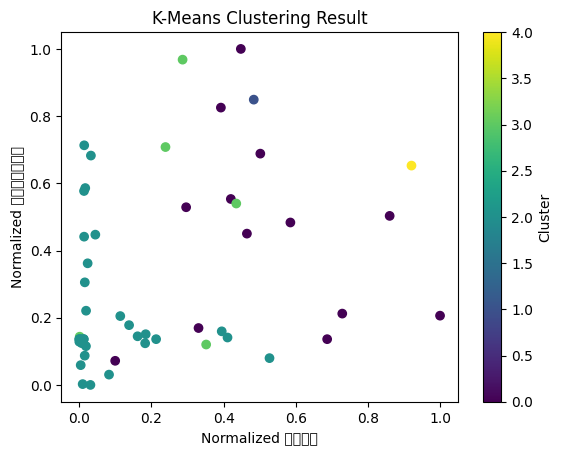

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 군집화에 사용할 데이터 선택
features = ['이용금액', '쓰레기통수','인구수 ']
data_for_clustering = df_standardized[features]  # 표준화된 데이터 사용

# K-평균 군집화 수행
kmeans = KMeans(n_clusters=5, random_state=42)  # 클러스터 수는 5로 설정 (필요에 따라 조정)
clusters = kmeans.fit_predict(data_for_clustering)

# 결과 데이터프레임에 군집 결과 추가
df_standardized['Cluster'] = clusters

# 군집 결과 출력
print(df_standardized.head())

# 군집화 결과 시각화 (2D, 예를 들어 '이용금액'과 '일평균유동인구'를 사용)
plt.scatter(df_standardized['인구수 '], df_standardized['쓰레기통수'], c=df_standardized['Cluster'], cmap='viridis')
plt.xlabel('Normalized 이용금액')
plt.ylabel('Normalized 일평균유동인구')
plt.title('K-Means Clustering Result')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df['상권수'] = df['상권수'].astype(float)

<ipython-input-9-81c8772ff408>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['이용금액'] = np.log1p(data_for_clustering['이용금액'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from curre

  법정동명      이용금액   일평균유동인구       상권수      인구수   일별예상쓰레기발생량     쓰레기통수  Cluster
0  원내동  0.065071  0.391480  0.232513  0.464622    0.464622  0.450307        1
1  교촌동  0.004873  0.021444  0.033031  0.182489    0.182489  0.123926        0
2  대정동  0.031387  0.092609  0.118523  0.184020    0.184020  0.150920        0
3  용계동  0.007345  0.057756  0.034326  0.137964    0.137964  0.177914        0
4  학하동  0.009069  0.084042  0.043394  0.113547    0.113547  0.204908        0


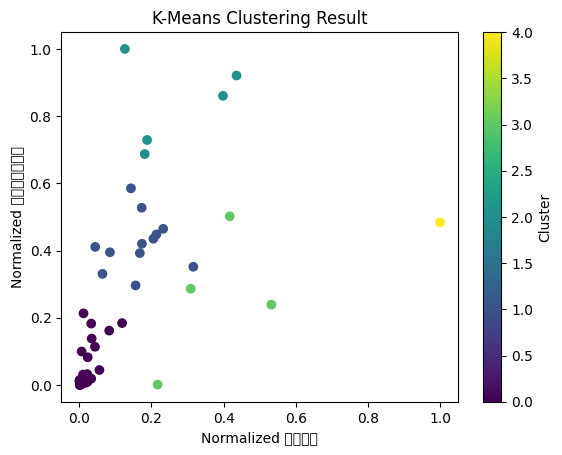

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 군집화에 사용할 열 선택
features = ['이용금액', '일평균유동인구', '상권수', '인구수 ', '일별예상쓰레기발생량']
data_for_clustering = df[features]

# 1. 로그 변환 (이용금액) 및 표준화
data_for_clustering['이용금액'] = np.log1p(data_for_clustering['이용금액'])

# 2. 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# 3. K-평균 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)  # 클러스터 수를 5로 설정
clusters = kmeans.fit_predict(scaled_data)

# 4. 클러스터 결과를 데이터프레임에 추가
# df['Cluster'] = clusters

# 5. 클러스터 결과 출력
print(df.head())

# 6. 군집화 결과 시각화 (2D, 예를 들어 '이용금액'과 '일평균유동인구'를 사용)
plt.scatter(df['상권수'], df['일별예상쓰레기발생량'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Normalized 이용금액')
plt.ylabel('Normalized 일평균유동인구')
plt.title('K-Means Clustering Result')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일러 객체 생성
scaler = MinMaxScaler()

# '상권수' 열을 정규화
df['상권수'] = scaler.fit_transform(df[['상권수']])

# 결과 확인
df

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수
0,원내동,0.065071,0.391480,0.232513,0.464622,0.464622,0.450307
1,교촌동,0.004873,0.021444,0.033031,0.182489,0.182489,0.123926
2,대정동,0.031387,0.092609,0.118523,0.184020,0.184020,0.150920
3,용계동,0.007345,0.057756,0.034326,0.137964,0.137964,0.177914
4,학하동,0.009069,0.084042,0.043394,0.113547,0.113547,0.204908
5,계산동,0.089775,0.084675,0.064119,0.330486,0.330486,0.169325
6,성북동,0.009553,0.009465,0.001943,0.015231,0.015231,0.305276
7,세동,0.000074,0.000496,0.001295,0.013337,0.013337,0.441227
8,송정동,0.001433,0.008510,0.004534,0.013055,0.013055,0.577178
9,방동,0.016484,0.013003,0.022021,0.013579,0.013579,0.713129


In [ ]:
df.to_csv('/content/drive/MyDrive/유성구 데이터/최종데이터_정규화.csv', index=False)

In [ ]:
# prompt: df의 각 변수들의 VIF지수 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산을 위한 함수 정의
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# VIF 계산
X = df[['이용금액', '일평균유동인구', '인구수 ', '상권수', '쓰레기통수']] # 독립 변수 선택
vif_data = calculate_vif(X)

# 결과 출력
vif_data

,features,VIF
0,이용금액,10.030949
1,일평균유동인구,6.627313
2,인구수,2.741967
3,상권수,21.388039
4,쓰레기통수,2.473440


In [ ]:
# prompt: factor_analyzer 설치

!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=0b22e31a001ac68554a37af49ee36f5385c03618bfb062141bb65818d6a18cf8
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
# prompt: '이용금액', '일평균유동인구', '인구수 ', '상권수', '쓰레기통수' 각 변수들의 KMO검정 값을 알려줘

from factor_analyzer import calculate_kmo

# KMO 검정 수행
kmo_all, kmo_model = calculate_kmo(df[['이용금액', '일평균유동인구', '인구수 ', '상권수', '쓰레기통수']])

# KMO 값 출력
print(f"KMO 통계량: {kmo_all}")


KMO 통계량: [0.63497765 0.77375737 0.8134743  0.63192602 0.94370798]


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [ ]:
# prompt: '이용금액', '일평균유동인구', '인구수 ', '상권수', '쓰레기통수'의 Best sub selection 진행

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# 독립 변수와 종속 변수 선택
X = df[['이용금액', '일평균유동인구', '인구수 ', '상권수', '쓰레기통수']]
y = df['일별예상쓰레기발생량']  # 예측하려는 목표 변수

# 선형 회귀 모델 생성
model = LinearRegression()

# SequentialFeatureSelector 객체 생성
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='backward', scoring='neg_mean_squared_error', cv=5)

# 특징 선택 수행
sfs.fit(X, y)

# 선택된 특징 출력
print(sfs.get_support())

# 선택된 특징의 이름 출력
selected_features = X.columns[sfs.get_support()]
print(selected_features)

[ True  True  True False False]
Index(['이용금액', '일평균유동인구', '인구수 '], dtype='object')


# 클러스터링 진행
>법정동별로 존재하는 `상권수`에 따라 `일별예상쓰레기발생량`이 높은 법정동을 우선적으로 쓰레기 안심구역 입지 선정

## K-means 클러스터링

In [ ]:
from scipy.spatial import ConvexHull

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-24-35814d1a4f7f>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

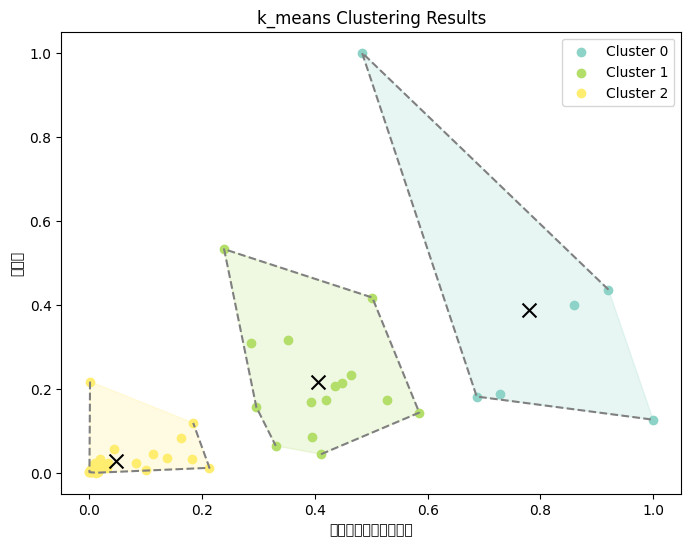

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

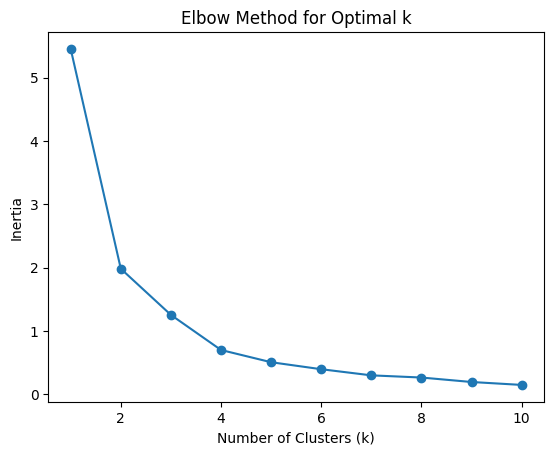

In [ ]:
# 1. '일별예상쓰레기발생량'과 '상권수' 를 이용해서 k-means 클러스터링 진행 및 시각화
features = ['일별예상쓰레기발생량', '상권수']
X = new_df[features]

# K-means 클러스터링 (클러스터 개수는 임의로 3으로 설정)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster_K_means'] = kmeans.fit_predict(X)

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당

for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster_K_means'] == cluster_id]
    plt.scatter(cluster_data['일별예상쓰레기발생량'], cluster_data['상권수'],
                label=f'Cluster {cluster_id}', color=colors(cluster_id))

    # ConvexHull을 사용하여 클러스터 영역 구분
    if len(cluster_data) > 2:  # ConvexHull은 3개 이상의 점이 필요
        hull = ConvexHull(cluster_data[['일별예상쓰레기발생량', '상권수']])
        plt.plot(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], '--', color='gray')
        plt.fill(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], alpha=0.2, color=colors(cluster_id))

    # 클러스터 중심점 표시
    center = cluster_data[['일별예상쓰레기발생량', '상권수']].mean()
    plt.scatter(center['일별예상쓰레기발생량'], center['상권수'], marker='x', color='black', s=100)

plt.title('k_means Clustering Results')
plt.xlabel('일별예상쓰레기발생량')
plt.ylabel('상권수')
plt.legend()
plt.show()

# 2. elbow기법에 따른 k개수 그래프
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Elbow plot 그리기
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## K-medoids 클러스터링

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00


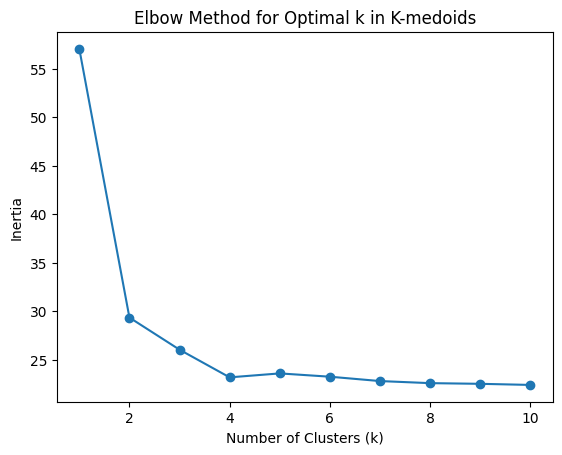

<ipython-input-25-25348356425c>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{H

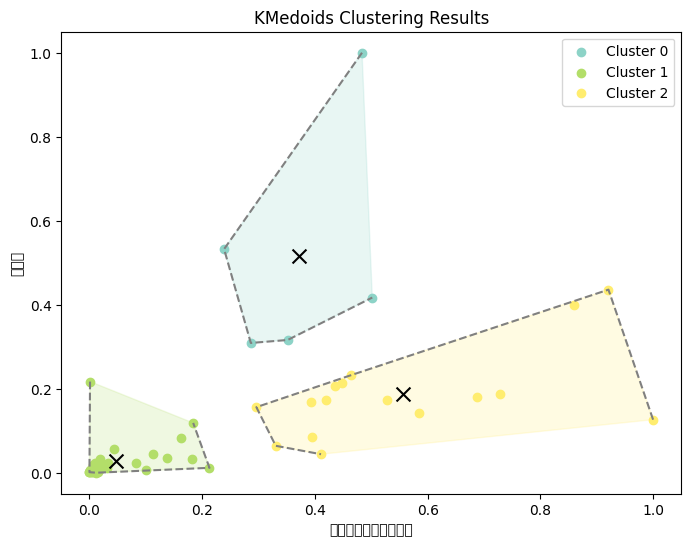

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# 특징 선택 및 데이터 준비
features = ['일별예상쓰레기발생량', '상권수']
X = new_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow 방법을 사용하여 최적의 k 찾기
inertia = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(X_scaled)
    inertia.append(kmedoids.inertia_)

# Elbow 그래프 그리기
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k in K-medoids')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 최적의 k를 선택하여 K-medoids 클러스터링 수행 (예: k=3)
n_clusters = 3  # Elbow 방법에서 선택된 값으로 변경
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
df['Cluster_K_Medoids'] = kmedoids.fit_predict(X_scaled)

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당

for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster_K_Medoids'] == cluster_id]
    plt.scatter(cluster_data['일별예상쓰레기발생량'], cluster_data['상권수'],
                label=f'Cluster {cluster_id}', color=colors(cluster_id), )

    # ConvexHull을 사용하여 클러스터 영역 구분
    if len(cluster_data) > 2:  # ConvexHull은 3개 이상의 점이 필요
        hull = ConvexHull(cluster_data[['일별예상쓰레기발생량', '상권수']])
        plt.plot(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], '--', color='gray')
        plt.fill(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], alpha=0.2, color=colors(cluster_id))

    # 클러스터 중심점 표시
    center = cluster_data[['일별예상쓰레기발생량', '상권수']].mean()
    plt.scatter(center['일별예상쓰레기발생량'], center['상권수'], marker='x', color='black', s=100)

plt.title('KMedoids Clustering Results')
plt.xlabel('일별예상쓰레기발생량')
plt.ylabel('상권수')
plt.legend()
plt.show()

## HierarChical 클러스터링

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import linkage, dendrogram

<ipython-input-27-fbf338c6b920>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{H

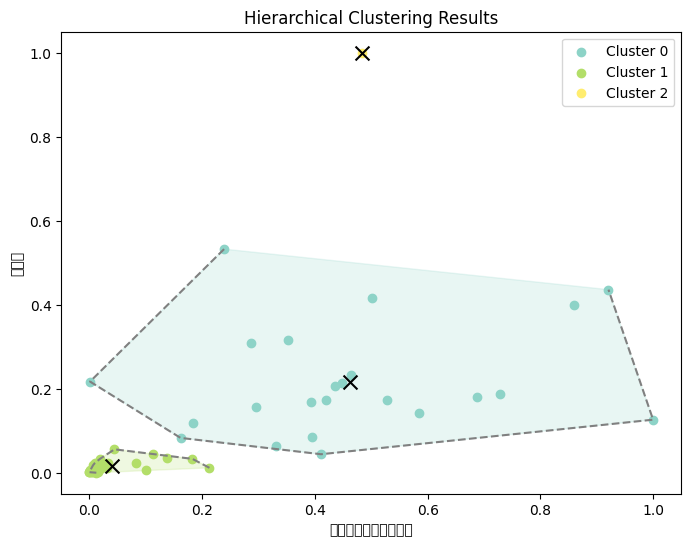

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

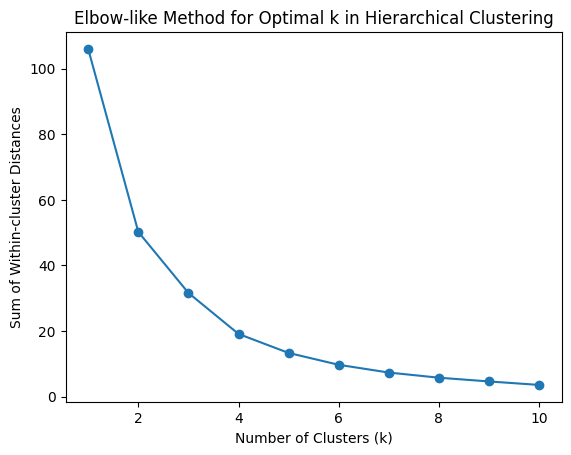

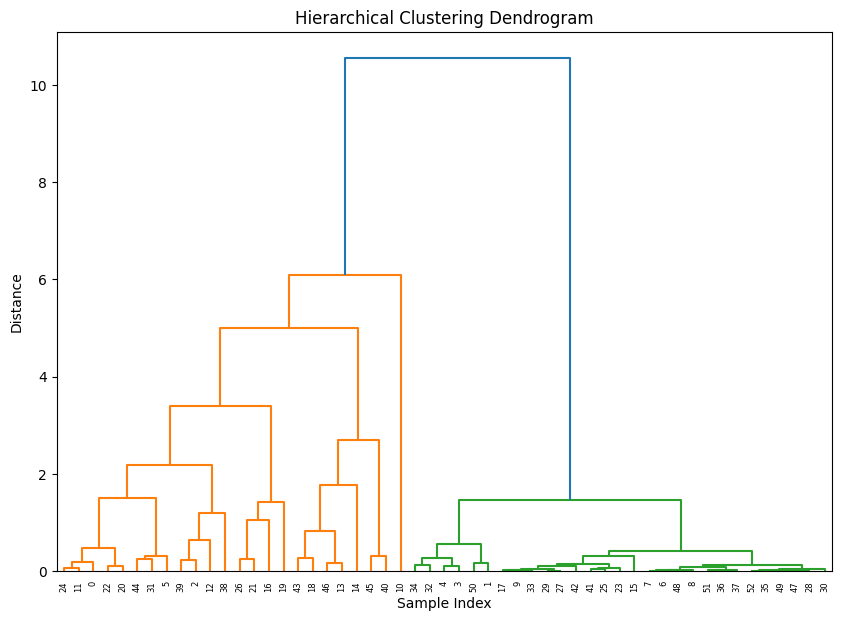

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# 특징 선택 및 데이터 준비
features = ['일별예상쓰레기발생량', '상권수']
X = new_df[features]

# 데이터 표준화 (선택 사항이지만 클러스터링 결과를 향상시킬 수 있음)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical 클러스터링 수행 (클러스터 수는 예시로 4로 설정)
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X_scaled)
df['Cluster_Hierarchical'] = clustering.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당

for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster_Hierarchical'] == cluster_id]
    plt.scatter(cluster_data['일별예상쓰레기발생량'], cluster_data['상권수'],
                label=f'Cluster {cluster_id}', color=colors(cluster_id))

    # ConvexHull을 사용하여 클러스터 영역 구분
    if len(cluster_data) > 2:  # ConvexHull은 3개 이상의 점이 필요
        hull = ConvexHull(cluster_data[['일별예상쓰레기발생량', '상권수']])
        plt.plot(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], '--', color='gray')
        plt.fill(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], alpha=0.2, color=colors(cluster_id))

    # 클러스터 중심점 표시
    center = cluster_data[['일별예상쓰레기발생량', '상권수']].mean()
    plt.scatter(center['일별예상쓰레기발생량'], center['상권수'], marker='x', color='black', s=100)

plt.title('Hierarchical Clustering Results')
plt.xlabel('일별예상쓰레기발생량')
plt.ylabel('상권수')
plt.legend()
plt.show()

# Elbow 방법을 사용하여 최적의 k 찾기 (Agglomerative Clustering에서는 직접적인 inertia_ 속성이 없음)
# 대신, 클러스터 내 거리의 합 또는 실루엣 점수와 같은 다른 메트릭을 사용할 수 있습니다.
# 여기서는 간단히 클러스터 수에 따른 클러스터 내 거리 합의 변화를 시각화합니다.

inertia_like = []
for i in range(1, 11):
    cluster_model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    cluster_model.fit(X_scaled)
    labels = cluster_model.labels_
    inertia_like.append(np.sum([np.sum(np.square(X_scaled[labels == j] - np.mean(X_scaled[labels == j], axis=0))) for j in range(i)]))

# Elbow 그래프 그리기
plt.plot(range(1, 11), inertia_like, marker='o')
plt.title('Elbow-like Method for Optimal k in Hierarchical Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Within-cluster Distances')
plt.show()

# 덴드로그램 생성
linked = linkage(X_scaled, 'ward')  # 'ward'는 Ward 연결 방법을 사용 (다른 방법도 가능)
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Gaussian Mixture 클러스터링

<ipython-input-28-15c72594777b>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', optimal_k)  # 각 클러스터에 고유 색상 할당
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.

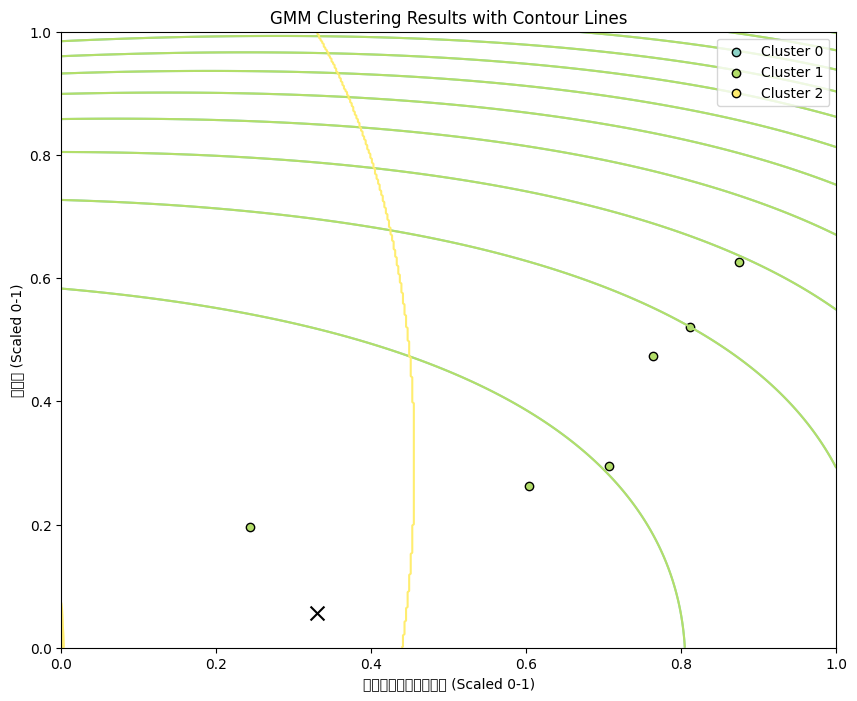

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 데이터 준비 및 표준화
features = ['일별예상쓰레기발생량', '상권수']
X = new_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 k를 선택하여 GMM 클러스터링 수행 (예: k=3)
optimal_k = 3  # BIC 그래프를 보고 적절한 값으로 변경
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('Set3', optimal_k)  # 각 클러스터에 고유 색상 할당

# x, y의 범위를 0~1로 설정
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
X_grid, Y_grid = np.meshgrid(x, y)
XX = np.c_[X_grid.ravel(), Y_grid.ravel()]

for cluster_id in range(optimal_k):
    # 클러스터의 가우시안 모델을 가져옴
    mean = gmm.means_[cluster_id]
    covar = gmm.covariances_[cluster_id]
    Z = gmm.predict_proba(XX)[:, cluster_id]
    Z = Z.reshape(X_grid.shape)

    # 등고선 플롯
    plt.contour(X_grid, Y_grid, Z, levels=10, colors=[colors(cluster_id)])

    # 데이터 포인트와 클러스터 중심점 표시
    cluster_data = df[df['Cluster_GMM'] == cluster_id]

    # X_scaled 데이터를 0~1 범위로 변환
    cluster_data_scaled = scaler.transform(cluster_data[['일별예상쓰레기발생량', '상권수']])

    plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1],
                label=f'Cluster {cluster_id}', color=colors(cluster_id), edgecolor='k')

    # 클러스터 중심점을 표시 (중심점을 다시 변환)
    center_scaled = scaler.transform([cluster_data[['일별예상쓰레기발생량', '상권수']].mean()])
    plt.scatter(center_scaled[0, 0], center_scaled[0, 1], marker='x', color='black', s=100)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('GMM Clustering Results with Contour Lines')
plt.xlabel('일별예상쓰레기발생량 (Scaled 0-1)')
plt.ylabel('상권수 (Scaled 0-1)')
plt.legend()
plt.show()

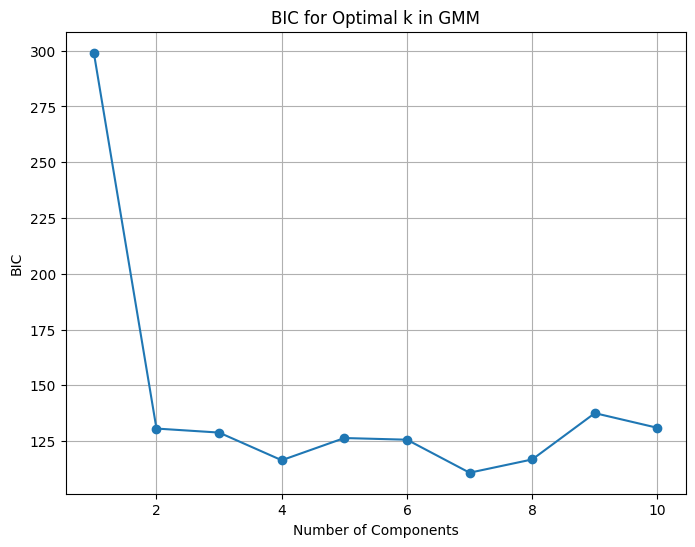

<ipython-input-29-348694cd4465>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', optimal_k)  # 각 클러스터에 고유 색상 할당
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HA

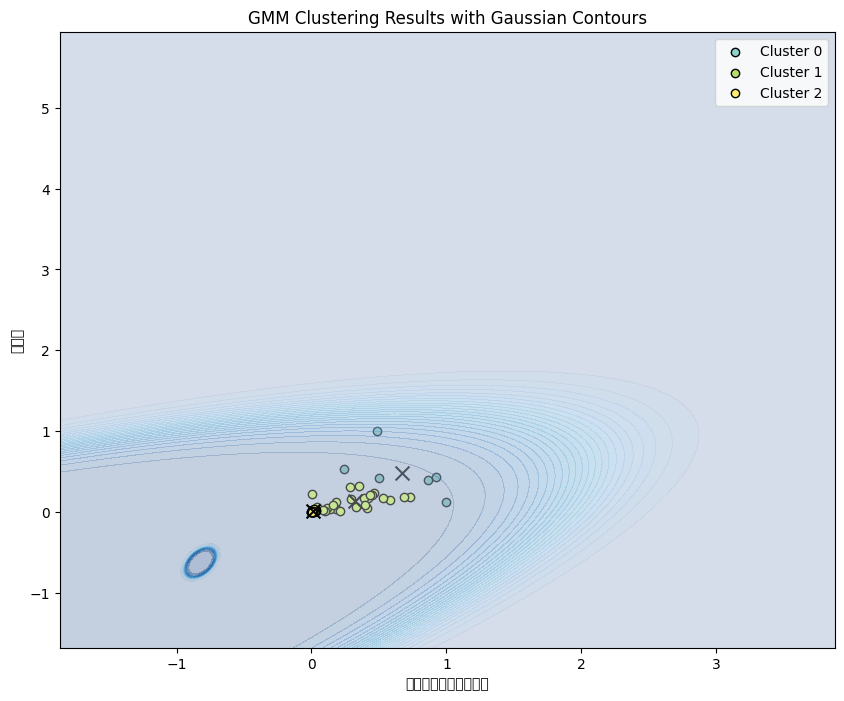

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap
from matplotlib.patches import Ellipse

# 데이터 준비 및 표준화
features = ['일별예상쓰레기발생량', '상권수']
X = new_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 k 찾기 (BIC 사용)
n_components_range = range(1, 11)
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

# BIC 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bics, marker='o')
plt.title('BIC for Optimal k in GMM')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.grid(True)
plt.show()

# 최적의 k를 선택하여 GMM 클러스터링 수행 (예: k=3)
optimal_k = 3  # BIC 그래프를 보고 적절한 값으로 변경
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('Set3', optimal_k)  # 각 클러스터에 고유 색상 할당

x = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500)
y = np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500)
X_grid, Y_grid = np.meshgrid(x, y)
XX = np.c_[X_grid.ravel(), Y_grid.ravel()]

for cluster_id in range(optimal_k):
    # 클러스터의 가우시안 모델을 가져옴
    gmm_component = gmm.predict_proba(XX)[:, cluster_id]
    Z = gmm_component.reshape(X_grid.shape)

    # 등고선 플롯
    plt.contourf(X_grid, Y_grid, Z, levels=np.linspace(0, Z.max(), 25), cmap='Blues', alpha=0.3)

    # 데이터 포인트와 클러스터 중심점 표시
    cluster_data = df[df['Cluster_GMM'] == cluster_id]
    plt.scatter(cluster_data['일별예상쓰레기발생량'], cluster_data['상권수'],
                label=f'Cluster {cluster_id}', color=colors(cluster_id), edgecolor='k')

    center = cluster_data[['일별예상쓰레기발생량', '상권수']].mean()
    plt.scatter(center['일별예상쓰레기발생량'], center['상권수'], marker='x', color='black', s=100)

plt.title('GMM Clustering Results with Gaussian Contours')
plt.xlabel('일별예상쓰레기발생량')
plt.ylabel('상권수')
plt.legend()
plt.show()

<ipython-input-13-6292993cba01>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', optimal_k)  # 각 클러스터에 고유 색상 할당
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HA

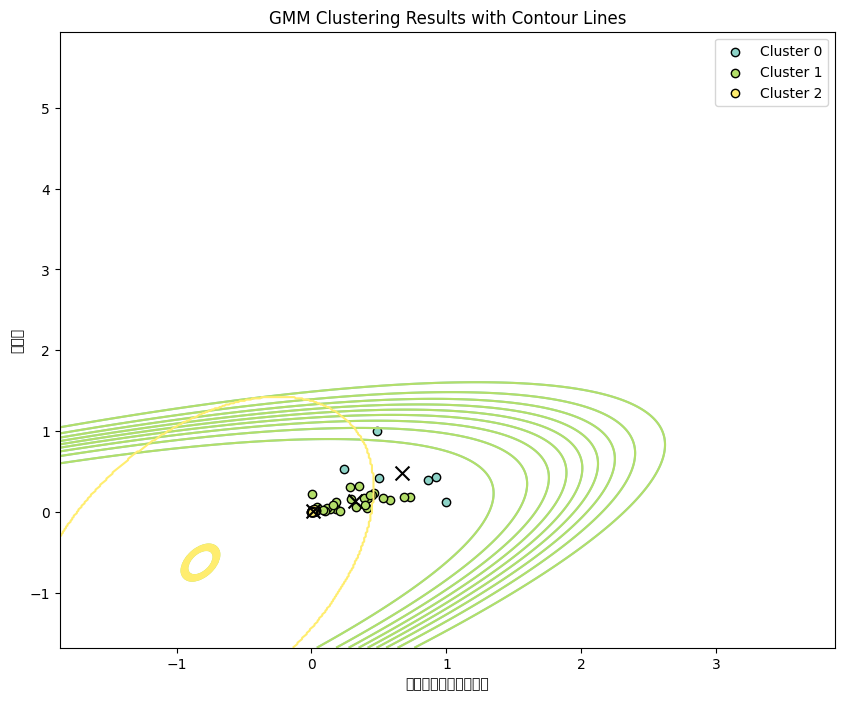

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# 데이터 준비 및 표준화
features = ['일별예상쓰레기발생량', '상권수']
X = new_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 k를 선택하여 GMM 클러스터링 수행 (예: k=3)
optimal_k = 3  # BIC 그래프를 보고 적절한 값으로 변경
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('Set3', optimal_k)  # 각 클러스터에 고유 색상 할당

x = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 500)
y = np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 500)
X_grid, Y_grid = np.meshgrid(x, y)
XX = np.c_[X_grid.ravel(), Y_grid.ravel()]

for cluster_id in range(optimal_k):
    # 클러스터의 가우시안 모델을 가져옴
    mean = gmm.means_[cluster_id]
    covar = gmm.covariances_[cluster_id]
    Z = gmm.predict_proba(XX)[:, cluster_id]
    Z = Z.reshape(X_grid.shape)

    # 등고선 플롯
    plt.contour(X_grid, Y_grid, Z, levels=10, colors=[colors(cluster_id)])

    # 데이터 포인트와 클러스터 중심점 표시
    cluster_data = df[df['Cluster_GMM'] == cluster_id]
    plt.scatter(cluster_data['일별예상쓰레기발생량'], cluster_data['상권수'],
                label=f'Cluster {cluster_id}', color=colors(cluster_id), edgecolor='k')

    # 클러스터 중심점을 표시
    center = cluster_data[['일별예상쓰레기발생량', '상권수']].mean()
    plt.scatter(center['일별예상쓰레기발생량'], center['상권수'], marker='x', color='black', s=100)

plt.title('GMM Clustering Results with Contour Lines')
plt.xlabel('일별예상쓰레기발생량')
plt.ylabel('상권수')
plt.legend()
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/유성구 데이터/최종데이터_정규화_클러스터.csv', index=False)

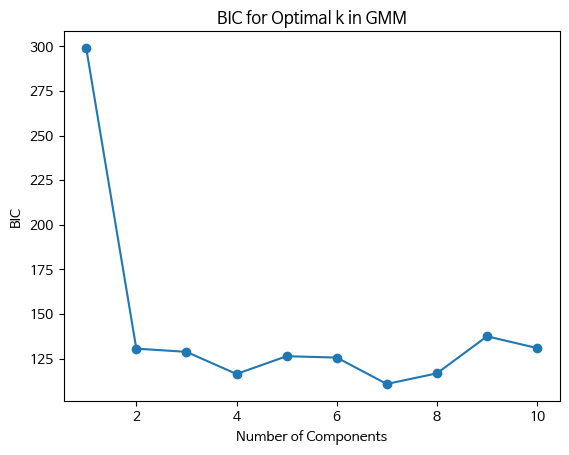

<ipython-input-247-dd7ef7214afc>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당


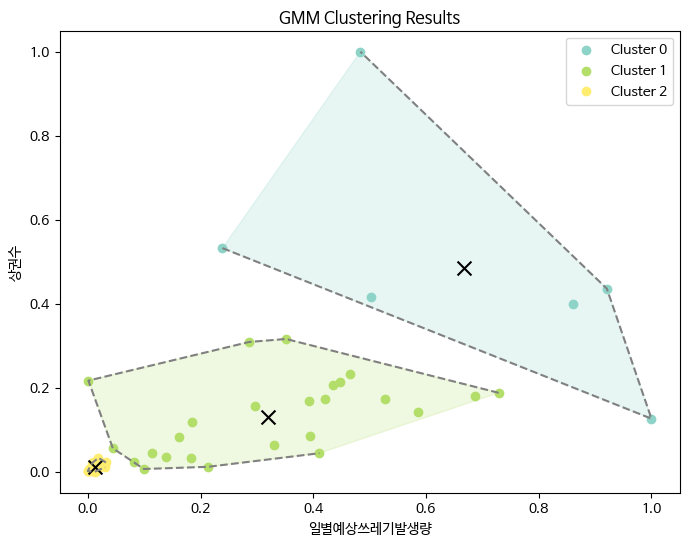

In [ ]:
from sklearn.mixture import GaussianMixture

# 특징 선택 및 데이터 준비
features = ['일별예상쓰레기발생량', '상권수']
X = new_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 k 찾기 (BIC 사용)
n_components_range = range(1, 11)
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

# BIC 그래프 그리기
plt.plot(n_components_range, bics, marker='o')
plt.title('BIC for Optimal k in GMM')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()

# 최적의 k를 선택하여 GMM 클러스터링 수행 (예: k=3)
optimal_k = 3  # BIC 그래프를 보고 적절한 값으로 변경
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3', n_clusters)  # 각 클러스터에 고유 색상 할당

for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster_GMM'] == cluster_id]
    plt.scatter(cluster_data['일별예상쓰레기발생량'], cluster_data['상권수'],
                label=f'Cluster {cluster_id}', color=colors(cluster_id))

    # ConvexHull을 사용하여 클러스터 영역 구분
    if len(cluster_data) > 2:  # ConvexHull은 3개 이상의 점이 필요
        hull = ConvexHull(cluster_data[['일별예상쓰레기발생량', '상권수']])
        plt.plot(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], '--', color='gray')
        plt.fill(cluster_data['일별예상쓰레기발생량'].iloc[hull.vertices],
                 cluster_data['상권수'].iloc[hull.vertices], alpha=0.2, color=colors(cluster_id))

    # 클러스터 중심점 표시
    center = cluster_data[['일별예상쓰레기발생량', '상권수']].mean()
    plt.scatter(center['일별예상쓰레기발생량'], center['상권수'], marker='x', color='black', s=100)

plt.title('GMM Clustering Results')
plt.xlabel('일별예상쓰레기발생량')
plt.ylabel('상권수')
plt.legend()
plt.show()

# 클러스터링 유형별 정확도

In [ ]:
from sklearn.metrics import silhouette_score

# K-means
kmeans_silhouette = silhouette_score(X, df['k_means'])
kmeans_score = (kmeans_silhouette + 1) * 50  # -1 ~ 1 범위를 0 ~ 100 범위로 변환

# K-medoids
kmedoids_silhouette = silhouette_score(X_scaled, df['Cluster_KMedoids'])
kmedoids_score = (kmedoids_silhouette + 1) * 50

# Hierarchical
hierarchical_silhouette = silhouette_score(X_scaled, df['Cluster_Hierarchical'])
hierarchical_score = (hierarchical_silhouette + 1) * 50

# GMM
gmm_silhouette = silhouette_score(X_scaled, df['Cluster_GMM'])
gmm_score = (gmm_silhouette + 1) * 50

print(f"K-means 정확도: {kmeans_score:.2f}%")
print(f"K-medoids 정확도: {kmedoids_score:.2f}%")
print(f"Hierarchical 정확도: {hierarchical_score:.2f}%")
print(f"GMM 정확도: {gmm_score:.2f}%")


K-means 정확도: 81.72%
K-medoids 정확도: 80.58%
Hierarchical 정확도: 78.96%
GMM 정확도: 71.41%


In [ ]:
new_df

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수
0,원내동,0.065071,0.391489,0.232513,0.464622,0.464622,0.450307
1,교촌동,0.004873,0.021459,0.033031,0.182489,0.182489,0.123926
2,대정동,0.031387,0.092623,0.118523,0.184020,0.184020,0.150920
3,용계동,0.007345,0.057770,0.034326,0.137964,0.137964,0.177914
4,학하동,0.009069,0.084056,0.043394,0.113547,0.113547,0.204908
5,계산동,0.089775,0.084690,0.064119,0.330486,0.330486,0.169325
6,성북동,0.009553,0.009480,0.001943,0.015231,0.015231,0.305276
7,세동,0.000074,0.000498,0.001295,0.013337,0.013337,0.441227
8,송정동,0.001433,0.008526,0.004534,0.013055,0.013055,0.577178
9,방동,0.016484,0.013018,0.022021,0.013579,0.013579,0.713129


# 각 클러스터링의 군집별로 변수 평균 및 총합 계산

In [ ]:
# 빈 데이터프레임 생성
result_df = pd.DataFrame(columns=['Cluster', '일별예상쓰레기발생량_평균', '일평균유동인구_평균', '상권수_평균', '총점'])

# 각 클러스터링 결과에 대해 반복
for cluster_name in ['k_means', 'Cluster_KMedoids', 'Cluster_Hierarchical', 'Cluster_GMM']:
  for cluster_id in df[cluster_name].unique():
    cluster_data = df[df[cluster_name] == cluster_id]
    avg_trash = cluster_data['일별예상쓰레기발생량'].mean()
    avg_flow = cluster_data['일평균유동인구'].mean()
    avg_store = cluster_data['상권수'].mean()
    total_score = avg_trash + avg_flow + avg_store

    # 결과 데이터프레임에 추가
    new_row = pd.DataFrame({'Cluster': [f'{cluster_name}_{cluster_id}'],
                            '일별예상쓰레기발생량_평균': [avg_trash],
                            '일평균유동인구_평균': [avg_flow],
                            '상권수_평균': [avg_store],
                            '총점': [total_score]})
    result_df = pd.concat([result_df, new_row], ignore_index=True)

# 결과 출력
print(result_df)


                   Cluster  일별예상쓰레기발생량_평균  일평균유동인구_평균    상권수_평균        총점
0                k_means_1       0.405544    0.282760  0.215501  0.903805
1                k_means_2       0.046536    0.054504  0.026757  0.127797
2                k_means_0       0.780133    0.401838  0.388277  1.570248
3       Cluster_KMedoids_2       0.556363    0.244584  0.186731  0.987677
4       Cluster_KMedoids_1       0.046536    0.054504  0.026757  0.127797
5       Cluster_KMedoids_0       0.372431    0.547817  0.514896  1.435145
6   Cluster_Hierarchical_0       0.462044    0.282735  0.216547  0.961325
7   Cluster_Hierarchical_1       0.039397    0.039782  0.015097  0.094276
8   Cluster_Hierarchical_2       0.483601    0.739992  1.000000  2.223593
9            Cluster_GMM_1       0.319133    0.177678  0.131140  0.627951
10           Cluster_GMM_2       0.012246    0.033565  0.010451  0.056261
11           Cluster_GMM_0       0.667567    0.536029  0.484996  1.688591


<ipython-input-171-a02c28552f4a>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row], ignore_index=True)


In [ ]:
result_df # 각 클러스터링별 총점 1위 확인

,Cluster,일별예상쓰레기발생량_평균,일평균유동인구_평균,상권수_평균,총점
0,k_means_1,0.405544,0.282760,0.215501,0.903805
1,k_means_2,0.046536,0.054504,0.026757,0.127797
2,k_means_0,0.780133,0.401838,0.388277,1.570248
3,Cluster_KMedoids_2,0.556363,0.244584,0.186731,0.987677
4,Cluster_KMedoids_1,0.046536,0.054504,0.026757,0.127797
5,Cluster_KMedoids_0,0.372431,0.547817,0.514896,1.435145
6,Cluster_Hierarchical_0,0.462044,0.282735,0.216547,0.961325
7,Cluster_Hierarchical_1,0.039397,0.039782,0.015097,0.094276
8,Cluster_Hierarchical_2,0.483601,0.739992,1.000000,2.223593
9,Cluster_GMM_1,0.319133,0.177678,0.131140,0.627951


In [ ]:
result_df['group'] = result_df['Cluster'].str.split('_').str[2].astype(int)

In [ ]:
df

,법정동명,이용금액,일평균유동인구,상권수,인구수,일별예상쓰레기발생량,쓰레기통수,k_means,Cluster_KMedoids,Cluster_Hierarchical,Cluster_GMM
0,원내동,0.065071,0.391489,0.232513,0.464622,0.464622,0.450307,1,2,0,1
1,교촌동,0.004873,0.021459,0.033031,0.182489,0.182489,0.123926,2,1,1,1
2,대정동,0.031387,0.092623,0.118523,0.184020,0.184020,0.150920,2,1,0,1
3,용계동,0.007345,0.057770,0.034326,0.137964,0.137964,0.177914,2,1,1,1
4,학하동,0.009069,0.084056,0.043394,0.113547,0.113547,0.204908,2,1,1,1
5,계산동,0.089775,0.084690,0.064119,0.330486,0.330486,0.169325,1,2,0,1
6,성북동,0.009553,0.009480,0.001943,0.015231,0.015231,0.305276,2,1,1,2
7,세동,0.000074,0.000498,0.001295,0.013337,0.013337,0.441227,2,1,1,2
8,송정동,0.001433,0.008526,0.004534,0.013055,0.013055,0.577178,2,1,1,2
9,방동,0.016484,0.013018,0.022021,0.013579,0.013579,0.713129,2,1,1,2


# 클러스터링 별로 총점이 가장 높은 군집 추출

In [ ]:
# 클러스터링 결과에서 총점이 가장 높은 Cluster를 4개 선정
top_clusters = result_df.sort_values(by='총점', ascending=False).head(4)
top_clusters

,Cluster,일별예상쓰레기발생량_평균,일평균유동인구_평균,상권수_평균,총점,group
8,Cluster_Hierarchical_2,0.483601,0.739992,1.000000,2.223593,2
11,Cluster_GMM_0,0.667567,0.536029,0.484996,1.688591,0
2,k_means_0,0.780133,0.401838,0.388277,1.570248,0
5,Cluster_KMedoids_0,0.372431,0.547817,0.514896,1.435145,0


In [ ]:
top_clusters['Cluster'] = top_clusters['Cluster'].str.split('_').str[:2].str.join('_')
top_clusters

,Cluster,일별예상쓰레기발생량_평균,일평균유동인구_평균,상권수_평균,총점,group
8,Cluster_Hierarchical,0.483601,0.739992,1.000000,2.223593,2
11,Cluster_GMM,0.667567,0.536029,0.484996,1.688591,0
2,k_means,0.780133,0.401838,0.388277,1.570248,0
5,Cluster_KMedoids,0.372431,0.547817,0.514896,1.435145,0


# 추출된 군집에 해당하는 법정동을 입지지수를 매겨서 순위 도출
* 입지지수 = 이용금액+일평균유동인구+상권수+인구수+일별예상쓰레기발생량 / 5
* 100점만점 환산 = (입지지수/최대입지지수) * 100

In [ ]:
score_rank_df = pd.read_csv('/content/drive/MyDrive/유성구 데이터/recycling_station_scores.csv')
score_rank_df.rename(columns={'입지지수_100점': '입지지수'}, inplace=True)
score_rank_df

,법정동명,입지지수
0,봉명동,100.000000
1,원신흥동,55.966504
2,상대동,67.259715
3,장대동,68.744242
4,지족동,46.775218
5,궁동,41.523351
6,도룡동,36.853044
7,전민동,71.105389
8,관평동,81.803116
9,송강동,52.401904


In [ ]:
score_rank_df.sort_values(by='입지지수', ascending=False)

,법정동명,입지지수
0,봉명동,100.000000
8,관평동,81.803116
7,전민동,71.105389
3,장대동,68.744242
2,상대동,67.259715
1,원신흥동,55.966504
9,송강동,52.401904
4,지족동,46.775218
5,궁동,41.523351
6,도룡동,36.853044


In [ ]:
# 조건에 맞는 데이터 추출
filtered_df = df[
    (df['k_means'] == 0) |
    (df['Cluster_KMedoids'] == 0) |
    (df['Cluster_Hierarchical'] == 2) |
    (df['Cluster_GMM'] == 0)
]

# 결과 확인
filtered_df.to_csv('/content/drive/MyDrive/유성구 데이터/filtered_df.csv', index=False)